In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import logging
import json 
import csv 

import plotly 
import plotly.express as px
import plotly.graph_objs as go



In [2]:
logging.basicConfig(filename=r'C:\Users\prvzs\OneDrive\Desktop\Adult_Census_Income_Prediction\logs\logs.txt',
                    filemode='a',
                    format='%(asctime)s %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S')

logging.warning('IMPORT REQUIRED LIBRARIES')

logging.warning('LOAD DATASET...')

data = pd.read_csv(r"C:\Users\prvzs\OneDrive\Desktop\Adult_Census_Income_Prediction\Dataset\adult.csv")

In [3]:
logging.warning('Check Head')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
logging.warning('Check Tail')
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
## Checking Null Values
logging.warning('Checking null values')
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [6]:
logging.warning("Checking null values done.")
logging.warning('Storing null values in reports folder')
missing_values = data.isna().sum()
missing_values = pd.DataFrame(missing_values,columns=['Value Counts'] )
missing_values

,Value Counts
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:

missing_values['Features'] = missing_values.index 
missing_values = missing_values.reset_index(drop=True)
missing_values

,Value Counts,Features
0,0,age
1,0,workclass
2,0,fnlwgt
3,0,education
4,0,education-num
5,0,marital-status
6,0,occupation
7,0,relationship
8,0,race
9,0,sex


In [8]:
missing_values.to_csv(r"C:\Users\prvzs\OneDrive\Desktop\Adult_Census_Income_Prediction\reports\missing_value.csv",index=True)

In [9]:
logging.warning("Storing is done.")

In [10]:
logging.warning("-"*100)
logging.warning("EXPLORATORY DATA ANALYSIS and VISUALIZATION")

In [11]:
logging.warning("Count values of `workclass' columns and visualize it using bar graph")

In [12]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

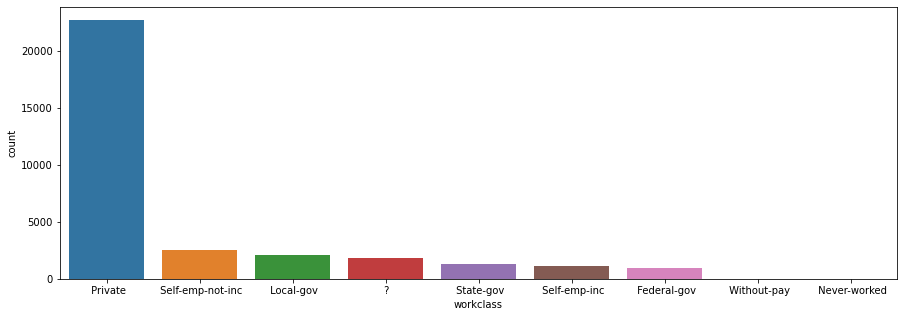

In [13]:
# Workclass
plt.figure(figsize=(15,5))
sns.countplot(x='workclass',
              data=data,
              order=data['workclass'].value_counts().index)
plt.show();

In [14]:
logging.warning("Using Piechart visualize the value counts in 'marital-status' with Plotly.")

In [15]:
# Create pie chart 
labels = ['Married-civ-spouse','Never-married','Divorced', 'Separated','Widowed','Married-spouse-absent','Married-AF-spouse']

fig = go.Figure(data=[go.Pie(labels = labels, values = data['marital-status'].value_counts(), rotation = 90)])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='black', width = 1.5)))

fig.update_layout(title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15,
                  template='plotly')


fig.show()

In [16]:
logging.warning("Using Piechart visualize the value counts in 'education' with Plotly.")

In [17]:

labels = ['HS-grad','Some-college','Bachelors','Masters','Assoc-voc','11th','Assoc-acdm','10th',
          '7th-8th','Prof-school','9th','12th','Doctorate','5th-6th','1st-4th','Preschool']
fig = go.Figure(data=[go.Pie(labels = labels, values = data['education'].value_counts(), rotation = 90)])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15,template='seaborn')


fig.show()

In [18]:
logging.warning("Visualize the types of 'occupation' using piechart. ")

In [19]:
labels = [' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv']
fig = go.Figure(data=[go.Pie(labels = labels, values = data['occupation'].value_counts(), rotation = 90)])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15,template='seaborn')


fig.show()

In [20]:
logging.warning('Distribution of age using Histogram.')

<AxesSubplot:xlabel='age', ylabel='Count'>

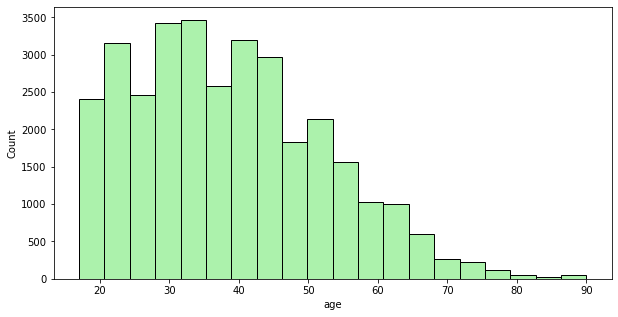

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(x='age',
            data=data,
            bins=20,
            color='lightgreen'
            )

In [22]:
logging.warning("Distribution of `hours-per-week`.")

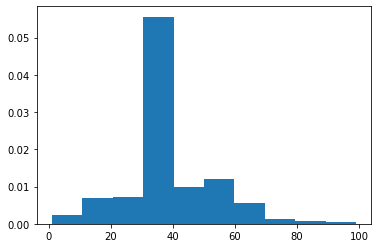

In [23]:
plt.hist(data['hours-per-week'],
         bins=None,
         density=True,
         )
plt.show()

In [24]:
logging.warning('Visualize the `fnlwgt` using displot.')

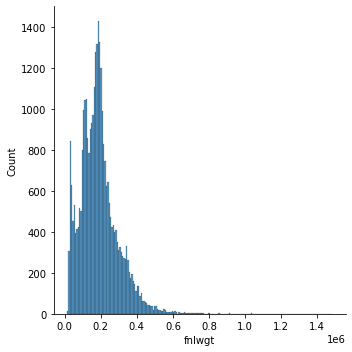

In [25]:
sns.displot(x='fnlwgt',
            data=data)

In [26]:
logging.warning('Exploratory Data Analysis and Visualization is done.')